# Depth-frequency plots

Loads depth-frequency-time data and then plots time-averaged depth-frequency power.

## Imports
Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import numpy as np
for i in range(2):
    %matplotlib notebook

In [2]:
# import data

adcp = 'Axis55'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2017
ds_in = xr.open_dataset(f'../Data/data/spectra/spectra_{adcp}_{year}_0.nc')

n_seg = ds_in.n_seg
if n_seg > 1:
    ds = [ds_in]
    for i in range(n_seg):
        if i > 0:
            ds_temp = xr.open_dataset(f'../Data/data/spectra/spectra_{adcp}_{year}_{i}.nc')
            ds.append(ds_temp)
elif n_seg == 1:
    ds = [ds_in]

#print(ds)

In [3]:
# extract plotting variables

t_stamp = int(ds[0].t_stamp)
start_date = dt.datetime(t_stamp,1,1)                                   # input start date in YYYY,MM,DD
end_date = dt.datetime(t_stamp+1,1,1)                                     # input end date in YYYY,MM,DD
depth = ds[0].depth.values
d = len(depth)

## Depth-frequency PSD plots

In [4]:
# time-average at each depth

Sxxu_t,Sxxv_t = [],[]
for i in range(n_seg):
    Sxxu_temp = ds[i].Sxxu.mean(dim='spect')
    Sxxu_t.append(Sxxu_temp)
    Sxxv_temp = ds[i].Sxxv.mean(dim='spect')
    Sxxv_t.append(Sxxv_temp)

In [5]:
# WKB scale at each depth

u_WKB,v_WKB = [],[]
for i in range(n_seg):
    u_WKB_temp,v_WKB_temp = [],[]
    for j in range(d):
        u_WKB_temp.append(Sxxu_t[i][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
        v_WKB_temp.append(Sxxv_t[i][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
    u_WKB.append(u_WKB_temp)
    v_WKB.append(v_WKB_temp)

<IPython.core.display.Javascript object>


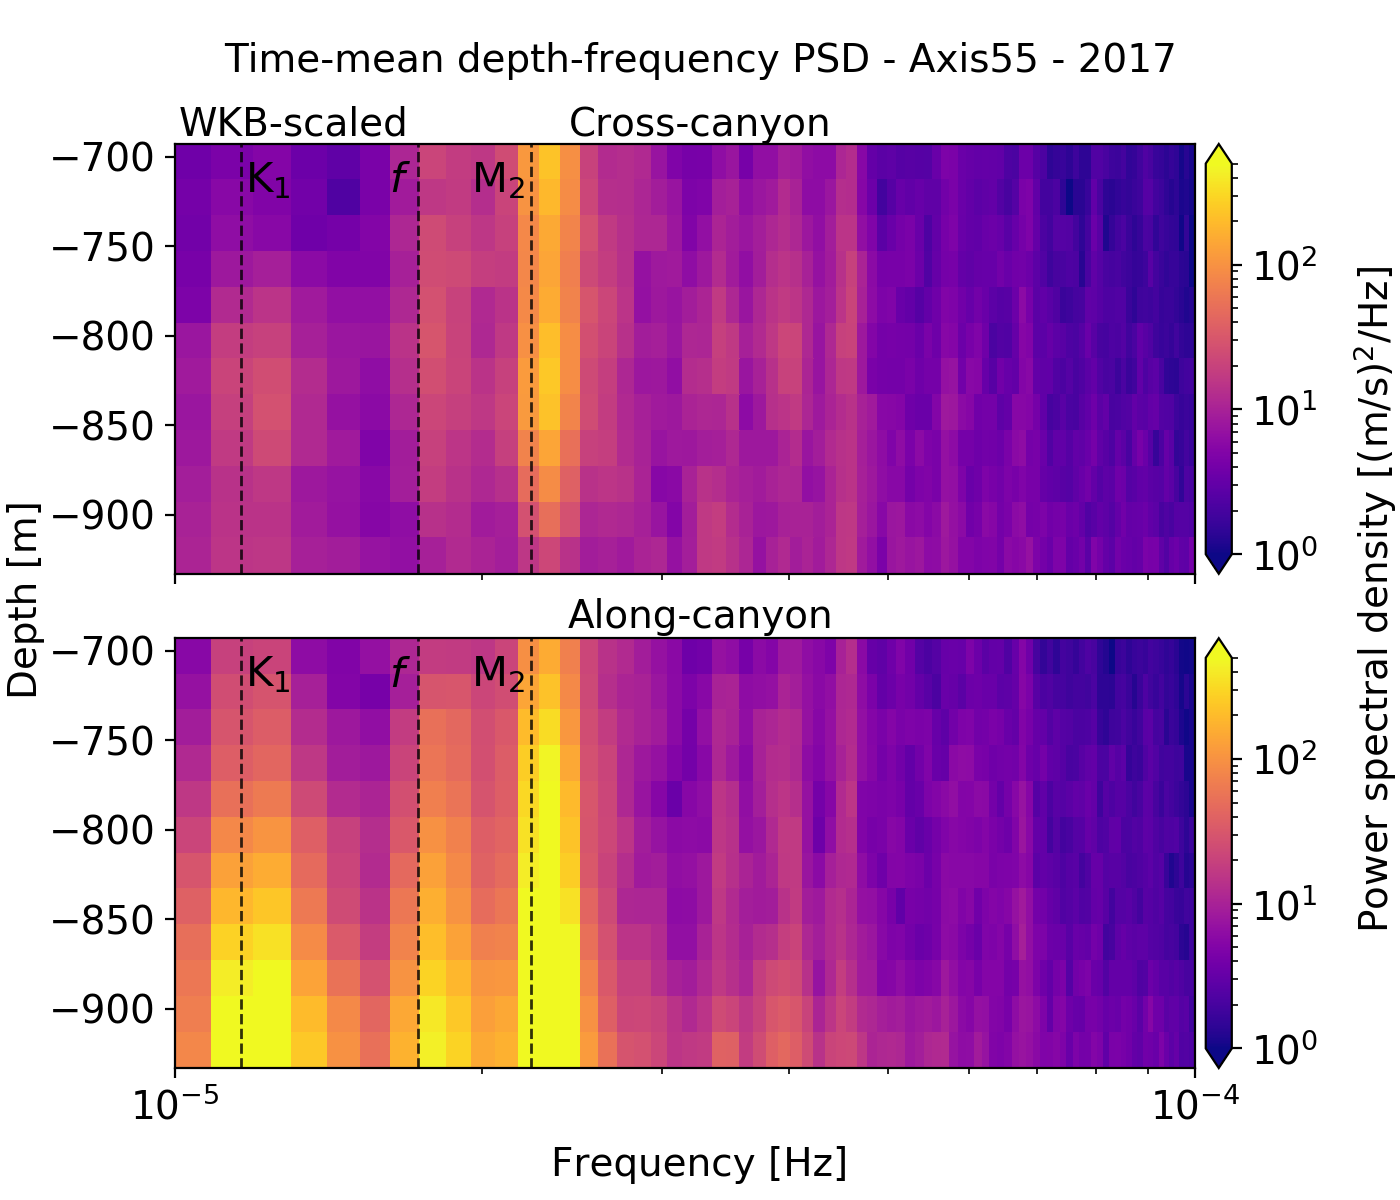

In [6]:
# plot PSD frequency band power versus depth

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(7,6),sharey=True,sharex=True)
fig.subplots_adjust(hspace = 0.15)

fig.text(0.5, 0.94, f'Time-mean depth-frequency PSD - {adcp} - {t_stamp}', ha='center', fontsize=14)
fig.text(0.005, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=14)
fig.text(0.965, 0.5, 'Power spectral density [(m/s)$^2$/Hz]', va='center', rotation='vertical',fontsize=14)
fig.text(0.5, 0.02, 'Frequency [Hz]', ha='center',fontsize=14)
fig.text(0.21, 0.887, 'WKB-scaled', ha='center',fontsize=14)

if adcp == 'Axis55' or adcp == 'Axis75':
    vmin = 1e0
    vmax = 5e2
    fig.text(0.5, 0.887, 'Cross-canyon', ha='center', fontsize=14)
    fig.text(0.5, 0.477, 'Along-canyon', ha='center', fontsize=14)
    for i in [ax0,ax1]:
        i.axvline(1.161e-5, color ='black',lw=1,ls='--',alpha=0.8) # constituents
        i.axvline(1.732e-5, color ='black',lw=1,ls='--',alpha=0.8)    
        i.axvline(2.236e-5, color ='black',lw=1,ls='--',alpha=0.8)
        i.text(1.17e-5,-720,'K$_1$',fontsize=15)
        i.text(1.62e-5,-720,'$f$',fontsize=15)
        i.text(1.95e-5,-720,'M$_2$',fontsize=15)
elif adcp == 'Slope':
    vmin = 1e0
    vmax = 2e2
    fig.text(0.5, 0.887, 'Cross-slope', ha='center', fontsize=14)
    fig.text(0.5, 0.477, 'Along-slope', ha='center', fontsize=14)
    for i in [ax0,ax1]:
        i.axvline(1.161e-5, color ='black',lw=1,ls='--',alpha=0.8) # constituents
        i.axvline(1.732e-5, color ='black',lw=1,ls='--',alpha=0.8)    
        i.axvline(2.236e-5, color ='black',lw=1,ls='--',alpha=0.8)
        i.text(1.17e-5,-125,'K$_1$',fontsize=15)
        i.text(1.62e-5,-125,'$f$',fontsize=15)
        i.text(1.95e-5,-125,'M$_2$',fontsize=15)

for i in range(n_seg):
    im0 = ax0.pcolormesh(Sxxu_t[i].specf, -depth, u_WKB[i], rasterized=True, \
                            norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  
    im1 = ax1.pcolormesh(Sxxv_t[i].specf, -depth, v_WKB[i], rasterized=True, \
                            norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar0.ax.tick_params(labelsize=14)
cbar1.ax.tick_params(labelsize=14)

ax0.patch.set_facecolor('grey')
ax1.patch.set_facecolor('grey')
ax0.set_xscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e-5,1e-4)

ax0.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./plots/depthfreq_plots/depthfreq_psd_{adcp}_{t_stamp}.pdf',format='pdf')

## Depth-frequency rotary plots

In [7]:
# time-average at each depth

cw_t,ccw_t = [],[]
for i in range(n_seg):
    cw_temp = ds[i].cw.mean(dim='spect')
    cw_t.append(cw_temp)
    ccw_temp = ds[i].ccw.mean(dim='spect')
    ccw_t.append(ccw_temp)

In [8]:
# WKB scale at each depth

cw_WKB,ccw_WKB = [],[]
for i in range(n_seg):
    cw_WKB_temp,ccw_WKB_temp = [],[]
    for j in range(d):
        cw_WKB_temp.append(cw_t[i][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
        ccw_WKB_temp.append(ccw_t[i][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
    cw_WKB.append(cw_WKB_temp)
    ccw_WKB.append(ccw_WKB_temp)

<IPython.core.display.Javascript object>


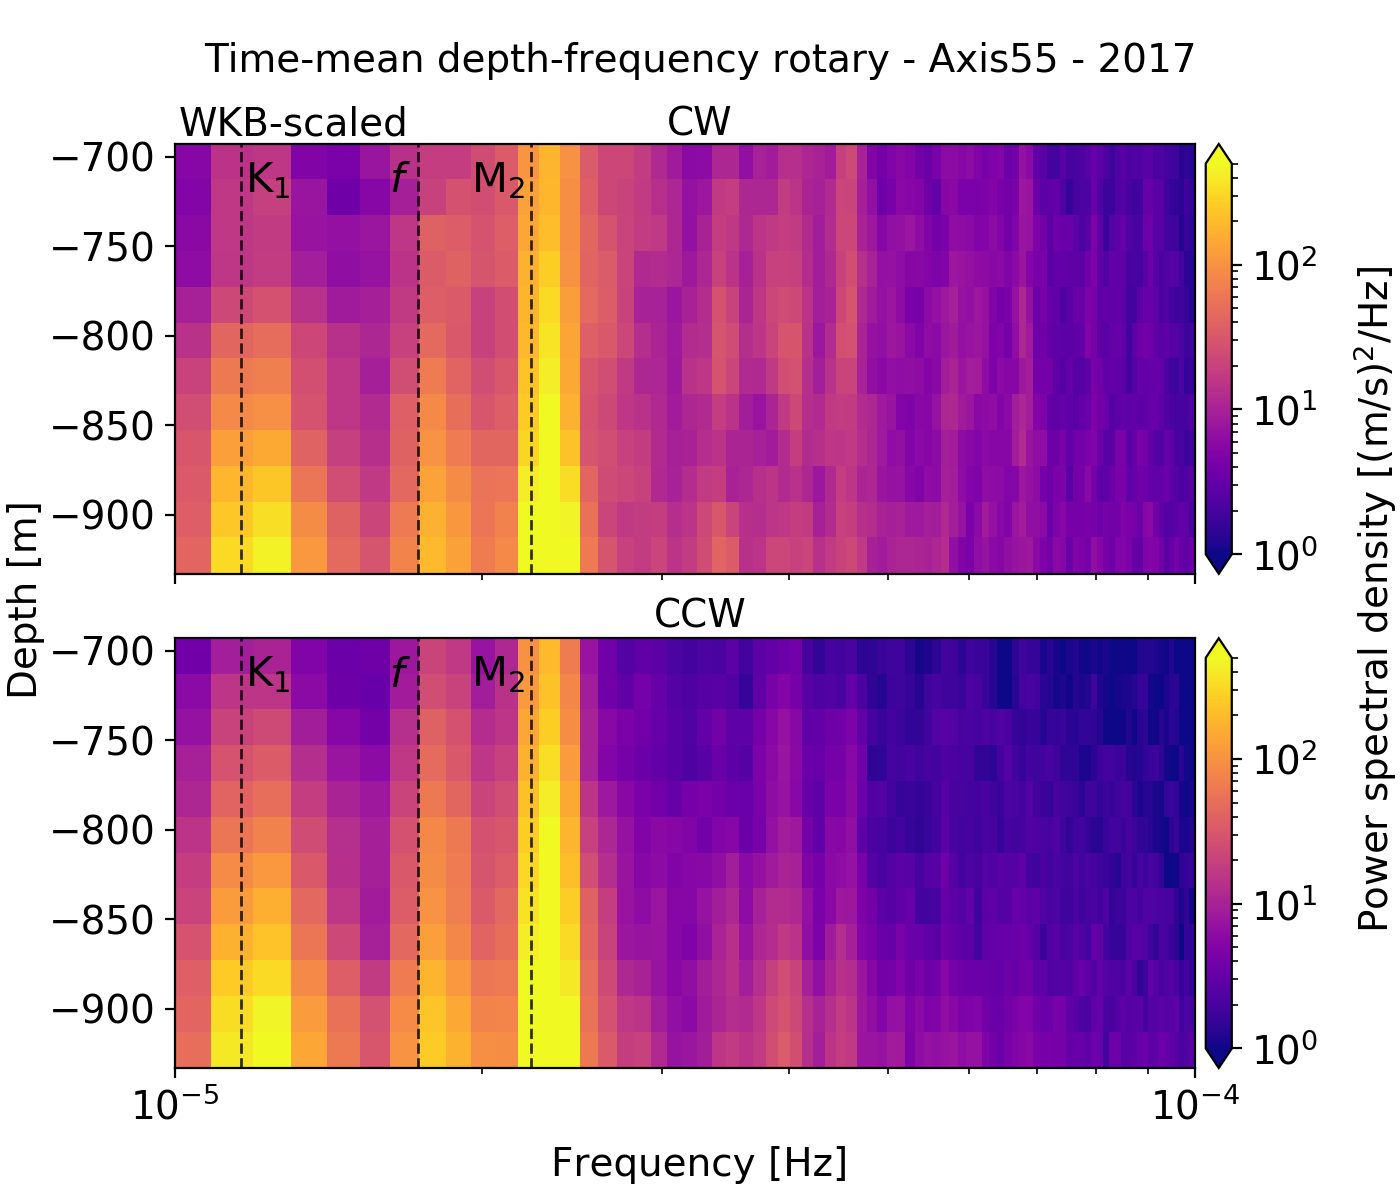

In [9]:
# plot PSD frequency band power versus depth

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(7,6),sharey=True,sharex=True)
fig.subplots_adjust(hspace = 0.15)

fig.text(0.5, 0.94, f'Time-mean depth-frequency rotary - {adcp} - {t_stamp}', ha='center', fontsize=14)
fig.text(0.005, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=14)
fig.text(0.965, 0.5, 'Power spectral density [(m/s)$^2$/Hz]', va='center', rotation='vertical',fontsize=14)
fig.text(0.5, 0.02, 'Frequency [Hz]', ha='center',fontsize=14)
fig.text(0.21, 0.887, 'WKB-scaled', ha='center',fontsize=14)

if adcp == 'Axis55' or adcp == 'Axis75':
    vmin = 1e0
    vmax = 5e2
    for i in [ax0,ax1]:
        i.axvline(1.161e-5, color ='black',lw=1,ls='--',alpha=0.8) # constituents
        i.axvline(1.732e-5, color ='black',lw=1,ls='--',alpha=0.8)    
        i.axvline(2.236e-5, color ='black',lw=1,ls='--',alpha=0.8)
        i.text(1.17e-5,-720,'K$_1$',fontsize=15)
        i.text(1.62e-5,-720,'$f$',fontsize=15)
        i.text(1.95e-5,-720,'M$_2$',fontsize=15)
elif adcp == 'Slope':
    vmin = 1e0
    vmax = 2e2
    for i in [ax0,ax1]:
        i.axvline(1.161e-5, color ='black',lw=1,ls='--',alpha=0.8) # constituents
        i.axvline(1.732e-5, color ='black',lw=1,ls='--',alpha=0.8)    
        i.axvline(2.236e-5, color ='black',lw=1,ls='--',alpha=0.8)
        i.text(1.17e-5,-125,'K$_1$',fontsize=15)
        i.text(1.62e-5,-125,'$f$',fontsize=15)
        i.text(1.95e-5,-125,'M$_2$',fontsize=15)

fig.text(0.5, 0.887, 'CW', ha='center', fontsize=14)
fig.text(0.5, 0.477, 'CCW', ha='center', fontsize=14)    
    
for i in range(n_seg):
    im0 = ax0.pcolormesh(Sxxu_t[i].specf, -depth, cw_WKB[i], rasterized=True, \
                            norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  
    im1 = ax1.pcolormesh(Sxxv_t[i].specf, -depth, ccw_WKB[i], rasterized=True, \
                            norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma')  

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar0.ax.tick_params(labelsize=14)
cbar1.ax.tick_params(labelsize=14)

ax0.patch.set_facecolor('grey')
ax1.patch.set_facecolor('grey')
ax0.set_xscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e-5,1e-4)

ax0.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./plots/depthfreq_plots/depthfreq_rot_{adcp}_{t_stamp}.pdf',format='pdf')